# PMP Guage data

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from datetime import datetime

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
os.chdir("/content/gdrive/My Drive/IITbombay/credit seminar/koyna")

In [6]:
df = pd.read_excel("koyna_series_data.xlsx",index_col="Date",parse_dates=True)
df.head()

,Koyna,Mahabaleshwar,Navaja,Kargaon,Kati,Bamnoli,Pratapgad,Sonat,Valvan
Date,,,,,,,,,
1961-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1961-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1961-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1961-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1961-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Precipitaion(mm)')

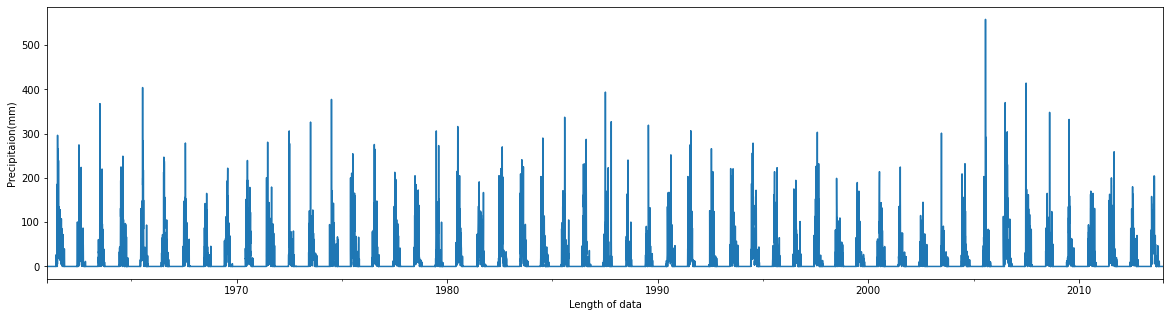

In [7]:
df['Koyna'].plot(figsize=(20,5))
plt.xlabel('Length of data')
plt.ylabel('Precipitaion(mm)')

In [8]:
ampd = df.resample('Y').max()
ampd.head()

,Koyna,Mahabaleshwar,Navaja,Kargaon,Kati,Bamnoli,Pratapgad,Sonat,Valvan
Date,,,,,,,,,
1961-12-31,296.2,362.7,245.0,0.0,360.2,262.25,343.4,286.0,374.0
1962-12-31,274.5,250.4,259.5,0.0,174.5,174.00,220.5,226.9,371.9
1963-12-31,367.7,371.2,248.6,0.0,224.9,158.80,307.3,314.7,342.7
1964-12-31,249.0,229.3,300.7,0.0,209.8,117.70,283.4,192.2,352.6
1965-12-31,404.0,279.4,529.4,0.0,309.0,181.75,291.6,243.8,509.8


In [9]:
koyna_data=ampd['Koyna']
mahabaleshwar_data=ampd['Mahabaleshwar'].truncate(before = '1980-01-01')
navaja_data=ampd['Navaja'].truncate(before='1979-01-01')
kargaon_data=ampd['Kargaon'].truncate(before='1993-01-01')
kati_data=ampd['Kati'].truncate(before='1979-01-01')
bamnoli_data=ampd['Bamnoli'].truncate(before='1979-01-01')
valvan_data=ampd['Valvan'].truncate(before='1979-01-01')
sonat_data=ampd['Sonat'].truncate(before='1982-01-01')
pratapgad_data=ampd['Pratapgad'].truncate(before='1979-01-01')

In [10]:
all_data = [koyna_data,mahabaleshwar_data,navaja_data,kargaon_data,kati_data,bamnoli_data,valvan_data,sonat_data,pratapgad_data]

Text(0, 0.5, 'Precipitaion(mm)')

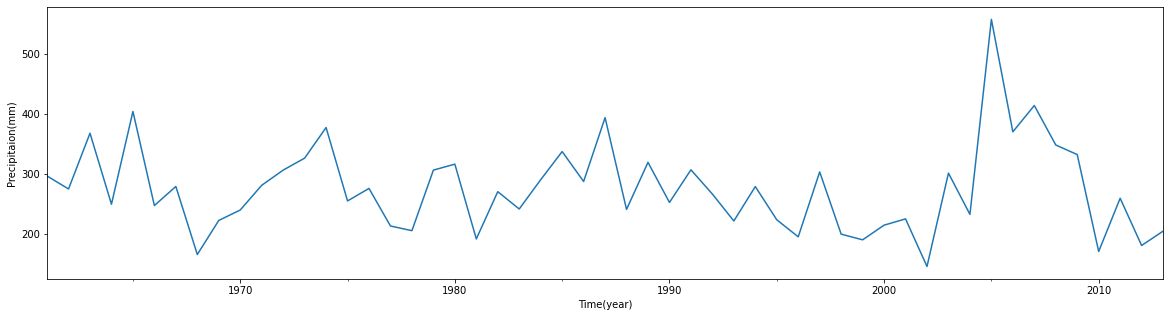

In [11]:
koyna_data.plot(figsize=(20,5)) #kati grided station
plt.xlabel('Time(year)')
plt.ylabel('Precipitaion(mm)')

In [12]:
kfreq=[]
mu = []
std1 = []
max = []

In [13]:
for i in all_data:
  ampd_avg = i.mean()
  mu.append(ampd_avg)
  ampd_std = i.std()
  std1.append(ampd_std)
  ampd_w_max=i.drop(i.idxmax())
  ampd_w_max_avg = ampd_w_max.mean()
  ampd_w_max_std=ampd_w_max.std()
  x_max=i.max()
  max.append(x_max)
  k=((x_max - ampd_w_max_avg)/ampd_w_max_std)
  PMP = ampd_avg + k*(ampd_std)
  kfreq.append(k)
  print(k,PMP)

4.4715437837077046 611.2030266895574
2.952185180878987 515.4319305009708
2.7798613072482623 580.2994744487585
1.8045918234290954 333.65087578365797
2.4864698007774932 357.0874192247436
3.5987571923749853 333.95089653345684
4.613239127920387 728.2117997977145
2.6001677025833527 396.5037077012818
2.8332228549407388 529.0941234387078


In [14]:
max

[558.0, 490.0, 552.0, 325.0, 343.154, 310.75, 640.0, 380.0, 506.0]

In [15]:
kfreq,mu ,std1

([4.4715437837077046,
  2.952185180878987,
  2.7798613072482623,
  1.8045918234290954,
  2.4864698007774932,
  3.5987571923749853,
  4.613239127920387,
  2.6001677025833527,
  2.8332228549407388],
 [274.6358490566038,
  309.3970588235294,
  323.05,
  241.64714285714285,
  207.33982857142857,
  189.8522857142857,
  339.3416,
  243.44,
  325.05942857142855],
 [75.2686754089836,
  69.79063271908177,
  92.54039896810728,
  50.983126340276264,
  60.22497864502135,
  40.041215096279906,
  84.29439467904068,
  58.86685983723587,
  72.01505328515606])

In [16]:
kmax=4.613239127920387
for i in all_data:
  ampd_avg = i.mean()
  ampd_std = i.std()
  PMP = ampd_avg + kmax*(ampd_std)
  print(PMP)

621.868247560066
631.3579364455182
749.9609894330359
476.84449615381385
485.17205653481085
374.57198592592067
728.2117997977145
515.0069011389417
657.2820901857822


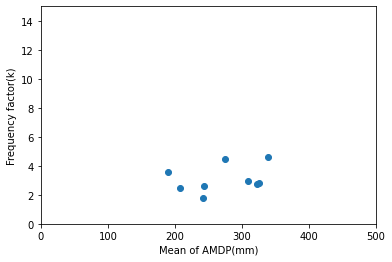

In [17]:
plt.scatter(mu,kfreq)
plt.xlabel('Mean of AMDP(mm)')
plt.ylabel('Frequency factor(k)')
plt.xlim(0, 500)
plt.ylim(0, 15)
plt.show()

In [18]:
pip install pymannkendall

In [19]:
import pymannkendall as mk
for i in all_data:
  result = mk.original_test(i)
  print(result)

Mann_Kendall_Test(trend='no trend', h=False, p=0.28978739478761395, z=-1.0585881306695468, Tau=-0.10087082728592163, s=-139.0, var_s=16994.333333333332, slope=-0.7996118012422363, intercept=290.78990683229813)
Mann_Kendall_Test(trend='no trend', h=False, p=0.08024188634387097, z=1.7492843121452852, Tau=0.21212121212121213, s=119.0, var_s=4550.333333333333, slope=2.375, intercept=257.3625)
Mann_Kendall_Test(trend='no trend', h=False, p=0.5319782309813548, z=0.6249890711264533, Tau=0.07563025210084033, s=45.0, var_s=4956.333333333333, slope=1.3636363636363635, intercept=305.6181818181818)
Mann_Kendall_Test(trend='no trend', h=False, p=0.2638720094732372, z=1.117286117105732, Tau=0.18095238095238095, s=38.0, var_s=1096.6666666666667, slope=3.218690476190476, intercept=203.81309523809523)
Mann_Kendall_Test(trend='no trend', h=False, p=0.4431544530574594, z=0.7668773306964645, Tau=0.09243697478991597, s=55.0, var_s=4958.333333333333, slope=1.0, intercept=185.0)
Mann_Kendall_Test(trend='no t

#gridded data

In [20]:
os.chdir("/content/gdrive/My Drive/IITbombay/credit seminar/koyna")

In [21]:
df = pd.read_excel("koynapmp.xlsx",index_col="Date",parse_dates=True)
df.head()

,17/73.25,17/73.5,17.25/73.25,17.25/73.5,17.5/73,17.5/73.25,17.5/73.5,17.75/73,17.75/73.25,17.75/73.5
Date,,,,,,,,,,
1901-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
ampd = df.resample('Y').max()
ampd.head()

,17/73.25,17/73.5,17.25/73.25,17.25/73.5,17.5/73,17.5/73.25,17.5/73.5,17.75/73,17.75/73.25,17.75/73.5
Date,,,,,,,,,,
1901-12-31,92.2,89.7,93.0,73.5,148.3,122.1,130.7,211.2,173.5,216.5
1902-12-31,122.5,118.8,172.0,131.6,220.6,216.2,206.8,240.3,165.2,161.3
1903-12-31,171.3,145.1,113.3,101.0,106.7,113.5,131.9,165.5,174.2,177.1
1904-12-31,221.4,177.6,171.4,135.4,163.5,162.8,255.9,243.9,247.4,192.7
1905-12-31,86.0,76.2,84.0,79.2,126.1,100.0,101.9,136.4,205.4,193.9


In [23]:
grid_1=ampd['17.75/73.5'].truncate(before = '1979-01-01')
grid_2=ampd['17.5/73.5'].truncate(before = '1961-01-01')

In [24]:
all_data = [grid_1,grid_2]

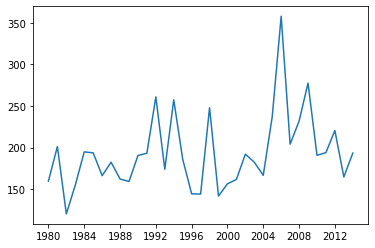

In [25]:
plt.plot(grid_1)

In [26]:
kfreq=[]
mu = []
std1 = []
max = []

In [27]:
for i in all_data:
  ampd_avg = i.mean()
  mu.append(ampd_avg)
  ampd_std = i.std()
  std1.append(ampd_std)
  ampd_w_max=i.drop(i.idxmax())
  ampd_w_max_avg = ampd_w_max.mean()
  ampd_w_max_std=ampd_w_max.std()
  x_max=i.max()
  max.append(x_max)
  k=((x_max - ampd_w_max_avg)/ampd_w_max_std)
  PMP = ampd_avg + k*(ampd_std)
  kfreq.append(k)
  print(k,PMP)

4.582344608865008 405.6523231864295
4.305558603803997 380.96350927035866


In [28]:
x_max

350.3

In [29]:
kmax = 4.582344608865008

In [30]:
for i in all_data:
  ampd_avg = i.mean()
  ampd_std = i.std()
  PMP = ampd_avg + kmax*(ampd_std)
  x_m = i.max()
  x_mi = i.min()
  print(PMP,x_m,x_mi)

405.6523231864295 357.9 120.2
394.1557501671467 350.3 75.2


In [31]:
import pymannkendall as mk
for i in all_data:
  result = mk.original_test(i)
  print(result)

Mann_Kendall_Test(trend='no trend', h=False, p=0.08317128750194613, z=1.7325747100920124, Tau=0.20672268907563024, s=123.0, var_s=4958.333333333333, slope=1.1111111111111112, intercept=171.51111111111112)
Mann_Kendall_Test(trend='no trend', h=False, p=0.09753553857148356, z=-1.656920552352334, Tau=-0.1574746008708273, s=-217.0, var_s=16994.333333333332, slope=-0.6173469387755101, intercept=189.35102040816327)
